# Úloha číslo 2

## Načtení knihoven

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


## Načtení datasetu + explorace dat

In [22]:
path = "/home/aerceas/Documents/dev/MSW/kody/data/druha_uloha/Refugees.csv"

df = pd.read_csv(path)

print(df.head())

   Year Country...territory.of.asylum.residence           Origin  \
0  1951                               Australia  Various/Unknown   
1  1951                                 Austria  Various/Unknown   
2  1951                                 Belgium  Various/Unknown   
3  1951                                  Canada  Various/Unknown   
4  1951                             Switzerland  Various/Unknown   

   Refugees..incl..refugee.like.situations.  Asylum.seekers..pending.cases.  \
0                                  180000.0                             NaN   
1                                  282000.0                             NaN   
2                                   55000.0                             NaN   
3                                  168511.0                             NaN   
4                                   10000.0                             NaN   

   Returned.refugees  Internally.displaced.persons..IDPs.  Returned.IDPs  \
0                NaN                    

## První graf

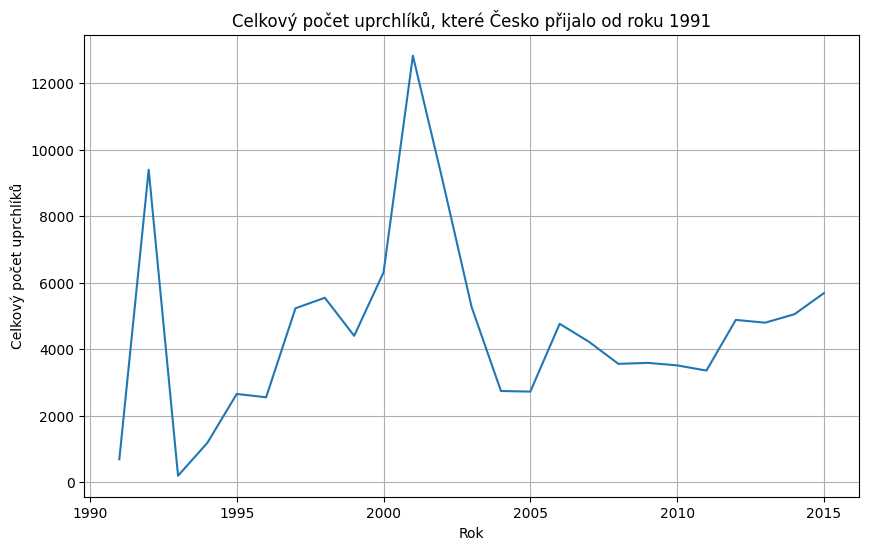

In [23]:
df_czech = df[(df['Country...territory.of.asylum.residence'] == 'Czech Rep.') & (df['Year'] >= 1991)]

df_czech_grouped = df_czech.groupby('Year')['Total.Population'].sum()

plt.figure(figsize=(10, 6))
df_czech_grouped.plot()
plt.title('Celkový počet uprchlíků, které Česko přijalo od roku 1991')
plt.xlabel('Rok')
plt.ylabel('Celkový počet uprchlíků')
plt.grid(True)
plt.savefig('graf_1.png')
plt.show()


## Druhý graf

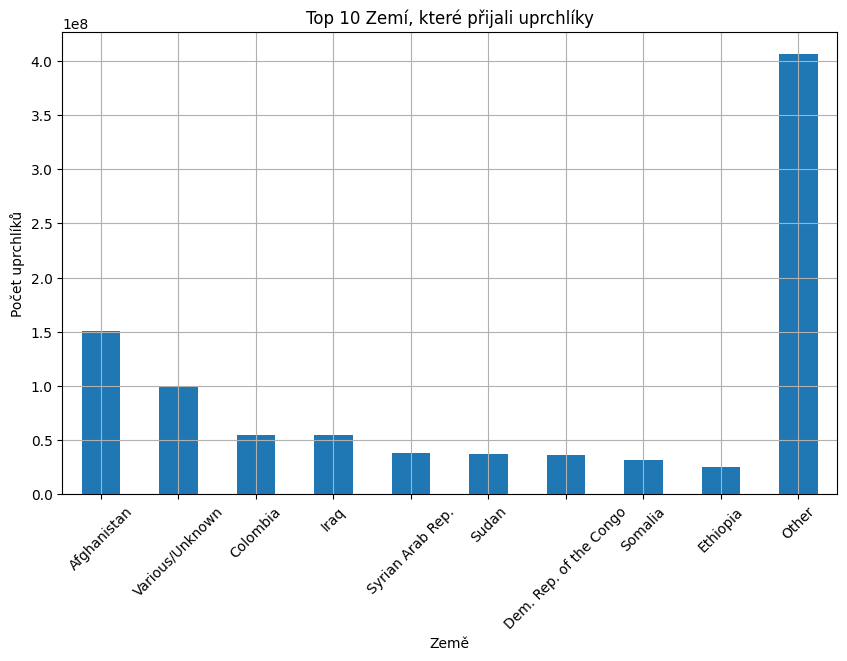

In [24]:
df_origin_grouped = df.groupby('Origin')['Total.Population'].sum()

top_9_origins = df_origin_grouped.nlargest(9)

rest_sum = df_origin_grouped.sum() - top_9_origins.sum()

other_series = pd.Series({'Other': rest_sum})

top_10 = pd.concat([top_9_origins, other_series])

plt.figure(figsize=(10, 6))
top_10.plot(kind='bar')

plt.title('Top 10 Zemí, které přijali uprchlíky')
plt.xlabel('Země')
plt.ylabel('Počet uprchlíků')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('graf_2.png')
plt.show()

## Třetí graf

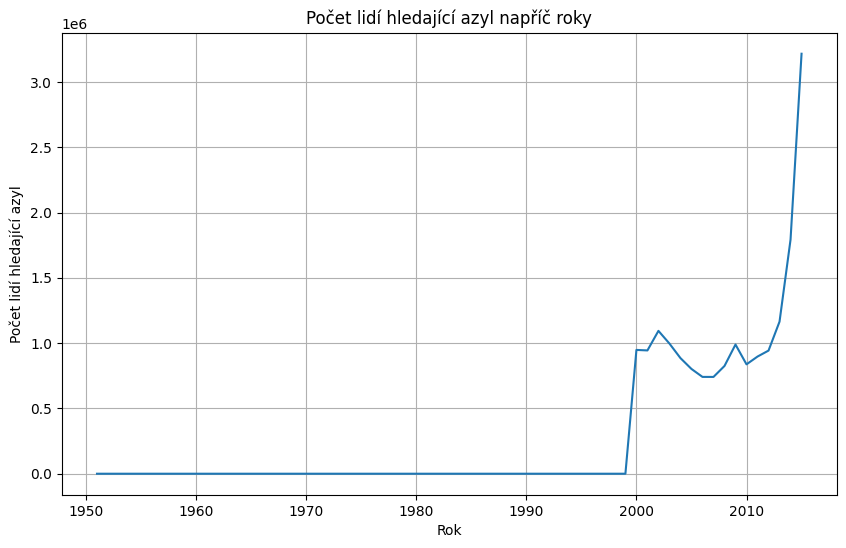

In [25]:
df_asylum_seekers = df[['Year', 'Asylum.seekers..pending.cases.']]

df_asylum_seekers_grouped = df_asylum_seekers.groupby('Year')['Asylum.seekers..pending.cases.'].sum()

plt.figure(figsize=(10, 6))
df_asylum_seekers_grouped.plot()
plt.title('Počet lidí hledající azyl napříč roky')
plt.xlabel('Rok')
plt.ylabel('Počet lidí hledající azyl')
plt.grid(True)
plt.savefig('graf_3.png')
plt.show()

## Čtvrtý graf

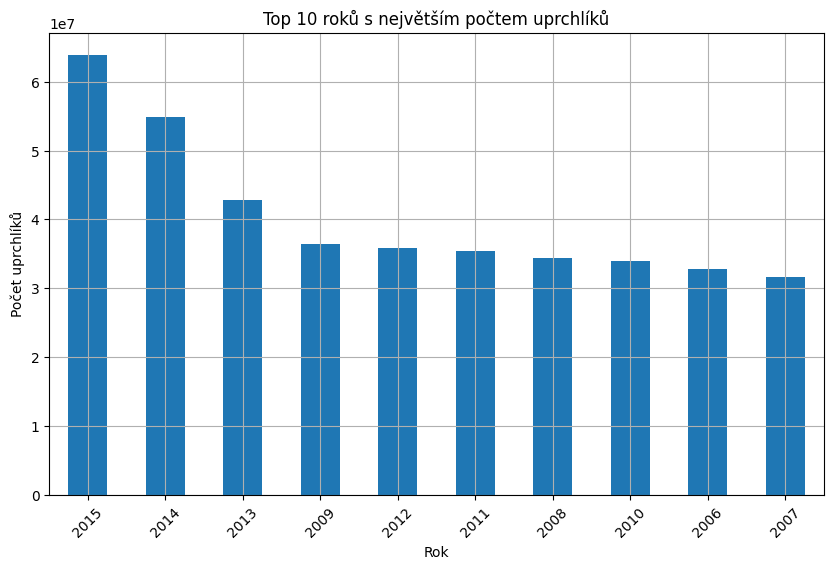

In [26]:
df_yearly_population = df.groupby('Year')['Total.Population'].sum()

top_10_years = df_yearly_population.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Top 10 roků s největším počtem uprchlíků')
plt.xlabel('Rok')
plt.ylabel('Počet uprchlíků')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('graf_4.png')
plt.show()

## Pátý graf

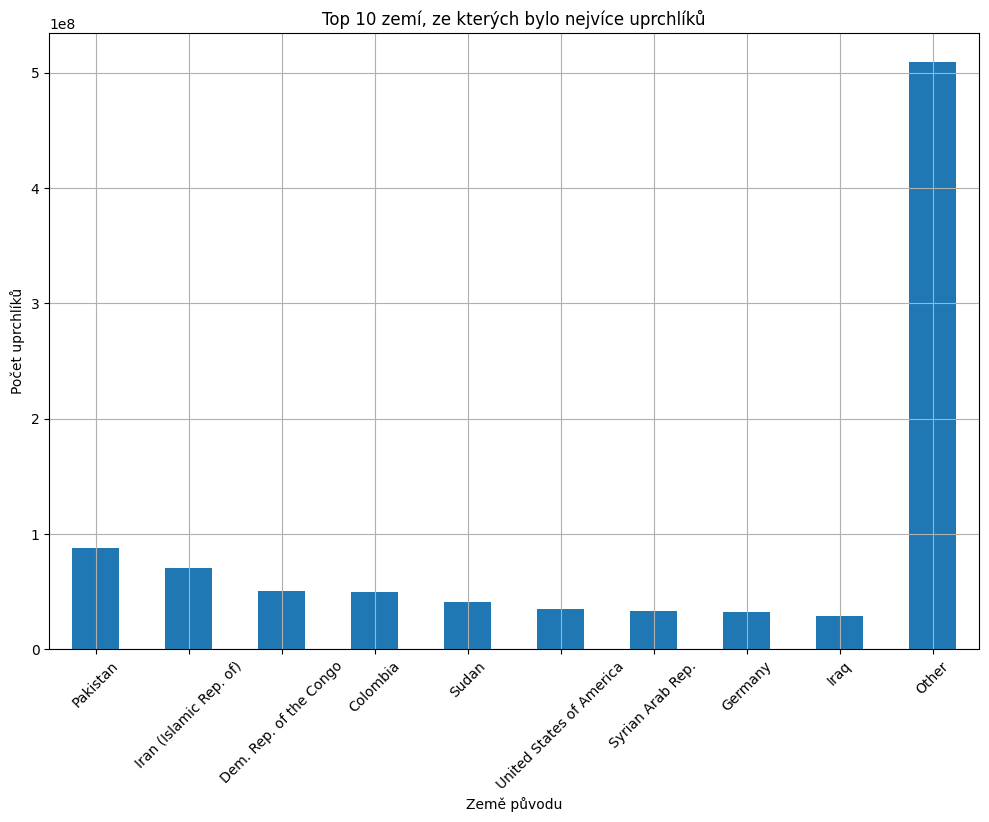

In [27]:
df_asylum = df.groupby('Country...territory.of.asylum.residence')['Total.Population'].sum()

top_9_asylum_countries = df_asylum.nlargest(9)

rest_sum_asylum = df_asylum.sum() - top_9_asylum_countries.sum()

other_series_asylum = pd.Series({'Other': rest_sum_asylum})

top_10_asylum = pd.concat([top_9_asylum_countries, other_series_asylum])

plt.figure(figsize=(12, 8))
top_10_asylum.plot(kind='bar')
plt.title('Top 10 zemí, ze kterých bylo nejvíce uprchlíků')
plt.xlabel('Země původu')
plt.ylabel('Počet uprchlíků')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('graf_5.png')
plt.show()